In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
dados = pd.read_csv('producao_santos_original.csv', sep=";" , decimal=',',encoding = "ISO-8859-1")

In [10]:
dados.head()

,Bacia,Campo,Estado,Contrato,Concessionária,Ind. Operadora,Percentual de Participação,Mês,Ano,Localização (Terra/Mar),...,Produção de Água (m³),Vol. Gás Injetado para Armazenamento (Mm³),Vol. Queima de Gás (Mm³),Vol. Gás para Consumo (Mm³),Vol. Gás Royalties (Mm³),Vol. Circulação Gás Lift (Mm³),Vol. Gás Injetado Recup. Secundária (Mm³),Vol. Água Injetado Recup. Secundária (m³),Vol. Água Injetado Descarte (m³),Vol. Água Produzida Descartada (m³)
0,Santos,ATAPU,Rio de Janeiro,'48610012913201005',Petróleo Brasileiro S.A.,SIM,100.0,11,2020,MAR,...,"91,909","0,00","4.105,803","7.418,695","11.452,519","0,00","29.035,219","0,00",0.0,"0,00"
1,Santos,ATAPU,Rio de Janeiro,'48610012913201005',Petróleo Brasileiro S.A.,SIM,100.0,5,2017,MAR,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",0.0,"0,00"
2,Santos,ATAPU,Rio de Janeiro,'48610012913201005',Petróleo Brasileiro S.A.,SIM,100.0,1,2018,MAR,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",0.0,"0,00"
3,Santos,ATAPU,Rio de Janeiro,'48610012913201005',Petróleo Brasileiro S.A.,SIM,100.0,7,2019,MAR,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",0.0,"0,00"
4,Santos,ATAPU,Rio de Janeiro,'48610012913201005',Petróleo Brasileiro S.A.,SIM,100.0,7,2017,MAR,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",0.0,"0,00"


O arquivo do banco de dados original foi obtidos do site: 
https://cdp.anp.gov.br/ords/r/cdp_apex/consulta-dados-publicos-cdp/produ%C3%A7%C3%A3o-mensal-de-hidrocarbonetos.

Optou-se por manter no arquivos apenas as variáveis para realizar a exploração inicial dos dados, sendo que a variável target é a previsão univaridada da variável 'Produção de Petróleo (m³)'.
Como cada 

In [11]:
dados.columns

Index(['Bacia', 'Campo', 'Estado', 'Contrato', 'Concessionária',
       'Ind. Operadora', 'Percentual de Participação', 'Mês', 'Ano',
       'Localização (Terra/Mar)', 'Lâmina D'Água (m)', '°API',
       'Data Início Produção', 'Data Descoberta', 'Área (Km²)',
       'Vol. Gás Disponível (Mm³)', 'Produção de Petróleo (m³)',
       'Produção de Óleo (m³)', 'Produção de Gás Total(Mm³)',
       'Produção de Gás Associado (Mm³)',
       'Produção de Gás Não Associado (Mm³)', 'Produção de Condensado (m³)',
       'Produção de Água (m³)', 'Vol. Gás Injetado para Armazenamento (Mm³)',
       'Vol. Queima de Gás (Mm³)', 'Vol. Gás para Consumo (Mm³)',
       'Vol. Gás Royalties (Mm³)', 'Vol. Circulação Gás Lift (Mm³)',
       'Vol. Gás Injetado Recup. Secundária (Mm³)',
       'Vol. Água Injetado Recup. Secundária (m³)',
       'Vol. Água Injetado Descarte (m³)',
       'Vol. Água Produzida Descartada (m³)'],
      dtype='object')

In [12]:
cols = ['Mês', 'Ano','Data Início Produção','Bacia', 'Campo', 'Estado','Localização (Terra/Mar)' ,  "Lâmina D'Água (m)" , 'Produção de Petróleo (m³)']

In [135]:
df = dados[cols]

In [136]:
df.sample(5)

,Mês,Ano,Data Início Produção,Bacia,Campo,Estado,Localização (Terra/Mar),Lâmina D'Água (m),Produção de Petróleo (m³)
1884,4,2019,01/11/2018,Santos,NOROESTE DE SAPINHOÁ,São Paulo,MAR,"2.169,00","14.637,741"
2697,3,2012,29/12/2010,Santos,TUPI,Rio de Janeiro,MAR,"2.156,00","356.690,34"
570,11,2015,10/03/2015,Santos,BÚZIOS,Rio de Janeiro,MAR,"1.940,00","16.486,34"
409,10,2015,19/02/2012,Santos,BAÚNA,São Paulo,MAR,"263,00","263.169,56"
284,11,2019,01/05/2019,Santos,AnC_TUPI,Rio de Janeiro,MAR,"2.160,00","21.864,699"


In [137]:
df.loc[:,'data'] = (df['Mês'].astype(str) + df['Ano'].astype(str)).values
df['data']= df['data'].apply( lambda x: pd.to_datetime( x , format = "%m%Y") )

C:\Users\herli\AppData\Local\Temp\ipykernel_32148\460621856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'data'] = (df['Mês'].astype(str) + df['Ano'].astype(str)).values
C:\Users\herli\AppData\Local\Temp\ipykernel_32148\460621856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data']= df['data'].apply( lambda x: pd.to_datetime( x , format = "%m%Y") )


Renomenado as variáveis para facilitar a manipulação.

In [138]:
df.drop(columns=['Mês','Ano'] , inplace = True)
df.rename( columns={'Data Início Produção': 'data_ini_prod',
                    'Localização (Terra/Mar)': 'localizacao',
                    "Lâmina D'Água (m)": 'profundidade',
                    "Produção de Petróleo (m³)": 'target',
                    "Bacia" : 'bacia' , 
                    "Campo" : 'campo' ,
                    "Estado" : 'estados'} , inplace = True)

C:\Users\herli\AppData\Local\Temp\ipykernel_32148\3729445234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Mês','Ano'] , inplace = True)
C:\Users\herli\AppData\Local\Temp\ipykernel_32148\3729445234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename( columns={'Data Início Produção': 'data_ini_prod',


In [139]:
df['target'] = df['target'].apply(lambda x: x.replace(".","").replace(",",".")).astype(float)
df['profundidade']  = df['profundidade'].apply(lambda x: x.replace(".","").replace(",",".")).astype(float)

C:\Users\herli\AppData\Local\Temp\ipykernel_32148\2433695148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].apply(lambda x: x.replace(".","").replace(",",".")).astype(float)
C:\Users\herli\AppData\Local\Temp\ipykernel_32148\2433695148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profundidade']  = df['profundidade'].apply(lambda x: x.replace(".","").replace(",",".")).astype(float)


In [110]:
df = df[df['target'] != 0]

In [111]:
df.shape

(2325, 8)

In [140]:
df = df.sort_values( by =['data'] ).reset_index(drop=True)

In [141]:
df[df['campo'] == 'MERLUZA']

,data_ini_prod,bacia,campo,estados,localizacao,profundidade,target,data
0,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,9062.0,2000-01-01
3,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,9926.0,2000-02-01
5,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,7072.0,2000-03-01
7,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,6660.0,2000-04-01
8,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,8582.0,2000-05-01
...,...,...,...,...,...,...,...,...
2883,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,0.0,2023-02-01
2917,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,0.0,2023-03-01
2938,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,0.0,2023-04-01
2971,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,0.0,2023-05-01


<Axes: xlabel='data', ylabel='target'>

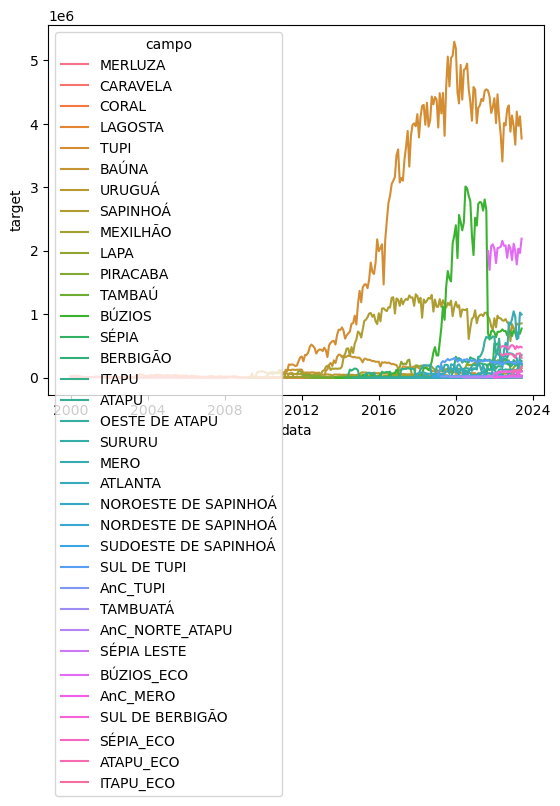

In [142]:
sns.lineplot(data = df , y='target' , x ='data', hue='campo')

In [143]:
df['localizacao'].value_counts()

localizacao
MAR    3019
Name: count, dtype: int64

In [144]:
df.groupby('campo').min()['data_ini_prod']

campo
ATAPU                   05/05/2015
ATAPU_ECO               01/05/2022
ATLANTA                 02/05/2018
AnC_MERO                01/01/2022
AnC_NORTE_ATAPU         01/06/2020
AnC_TUPI                01/05/2019
BAÚNA                   19/02/2012
BERBIGÃO                14/11/2019
BÚZIOS                  10/03/2015
BÚZIOS_ECO              01/09/2021
CARAVELA                31/12/1993
CORAL                   03/02/2003
ITAPU                   01/08/2016
ITAPU_ECO               01/12/2022
LAGOSTA                 25/04/2009
LAPA                    19/12/2016
MERLUZA                 30/09/1992
MERO                    01/12/2017
MEXILHÃO                19/04/2011
NORDESTE DE SAPINHOÁ    01/11/2018
NOROESTE DE SAPINHOÁ    01/11/2018
OESTE DE ATAPU          26/06/2020
PIRACABA                19/02/2012
SAPINHOÁ                05/01/2013
SUDOESTE DE SAPINHOÁ    01/11/2018
SUL DE BERBIGÃO         01/02/2022
SUL DE TUPI             01/02/2019
SURURU                  02/06/2020
SÉPIA         

In [146]:
df_plot = df.set_index('data')

<Axes: xlabel='data'>

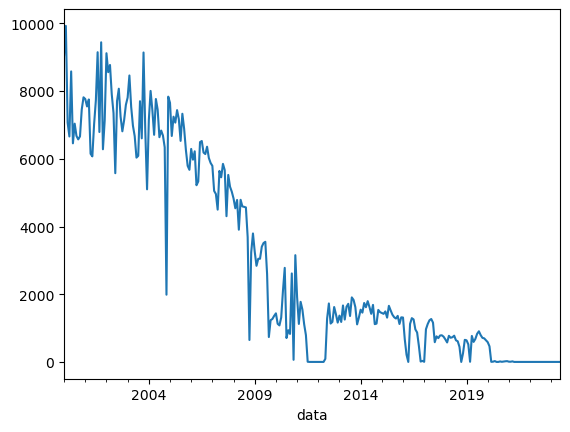

In [147]:
df_plot[df_plot['campo'] == 'MERLUZA']['target'].plot()

In [129]:
df_plot[df_plot['campo'] == 'MERLUZA'].describe()

,profundidade,target
count,242.0,242.000000
mean,131.0,3530.645868
std,0.0,2911.218002
min,131.0,2.630000
25%,131.0,1086.593000
50%,131.0,1868.574000
75%,131.0,6484.250000
max,131.0,9926.000000


<Axes: xlabel='data'>

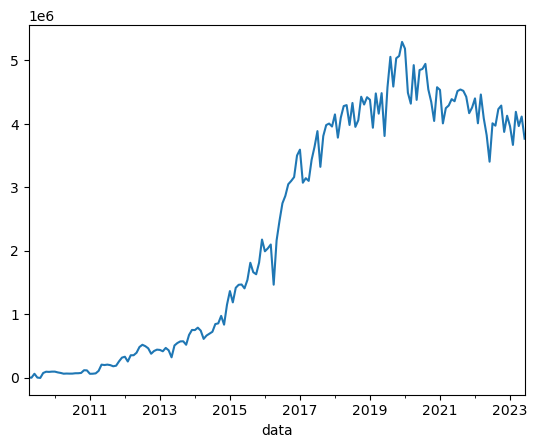

In [148]:
df_plot[df_plot['campo'] == 'TUPI']['target'].plot()

<Axes: xlabel='data'>

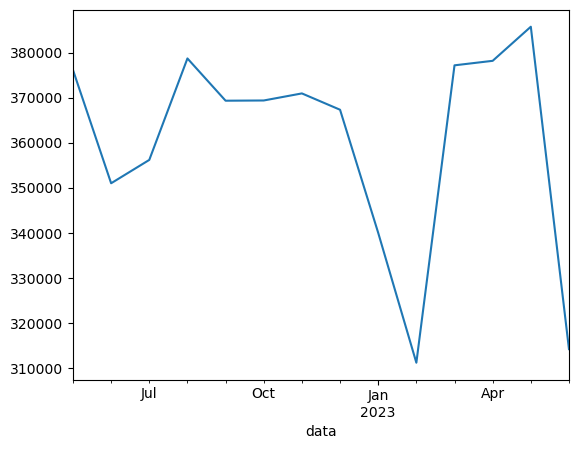

In [149]:
df_plot[df_plot['campo'] == 'ATAPU_ECO']['target'].plot() 

Vamos retirar as bacias que estão com a produção zerada no último mês.

In [150]:
df[(df['target'] == 0) & ( df['data'] == '2023-06-01')]

,data_ini_prod,bacia,campo,estados,localizacao,profundidade,target,data
2992,25/04/2009,Santos,LAGOSTA,São Paulo,MAR,131.0,0.0,2023-06-01
3002,30/09/1992,Santos,MERLUZA,São Paulo,MAR,131.0,0.0,2023-06-01


Vamos retirar também séries muito curtas, com produção iniciada posterior a 2020.

In [153]:
df['data_ini_prod'] = pd.to_datetime(df['data_ini_prod'])

C:\Users\herli\AppData\Local\Temp\ipykernel_32148\2129631155.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data_ini_prod'] = pd.to_datetime(df['data_ini_prod'])


In [155]:
df[(df['data_ini_prod'] >= '2020-01-01')]['campo'].unique()

array(['OESTE DE ATAPU', 'SURURU', 'AnC_NORTE_ATAPU', 'SÉPIA LESTE',
       'BÚZIOS_ECO', 'AnC_MERO', 'SUL DE BERBIGÃO', 'SÉPIA_ECO',
       'ATAPU_ECO', 'ITAPU_ECO'], dtype=object)

Portanto, as bacias que são filtradas por esse critério são as:

In [157]:
filtro_bacias = ['LAGOSTA', 'MERLUZA', 'OESTE DE ATAPU', 'SURURU', 'AnC_NORTE_ATAPU', 'SÉPIA LESTE', 'BÚZIOS_ECO', 'AnC_MERO', 'SUL DE BERBIGÃO', 'SÉPIA_ECO','ATAPU_ECO', 'ITAPU_ECO']

In [161]:
df = df[ ~df['campo'].isin(filtro_bacias)]

In [162]:
df.shape

(2244, 8)

<Axes: xlabel='data', ylabel='target'>

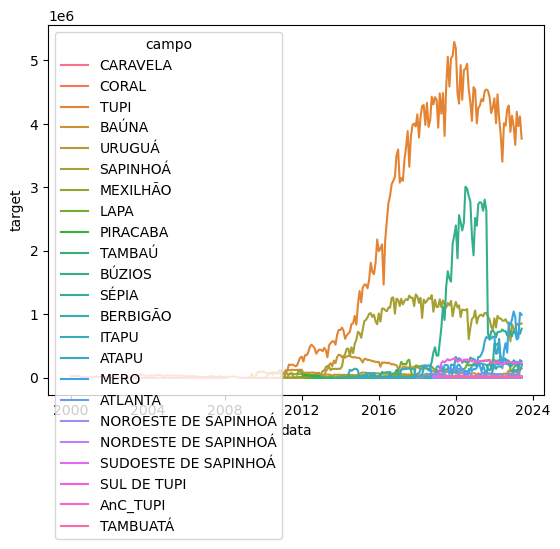

In [163]:
sns.lineplot(data = df , y='target' , x ='data', hue='campo')

Plotando cada série temporal de cada campo que sobrou para ver o comportamento delas.

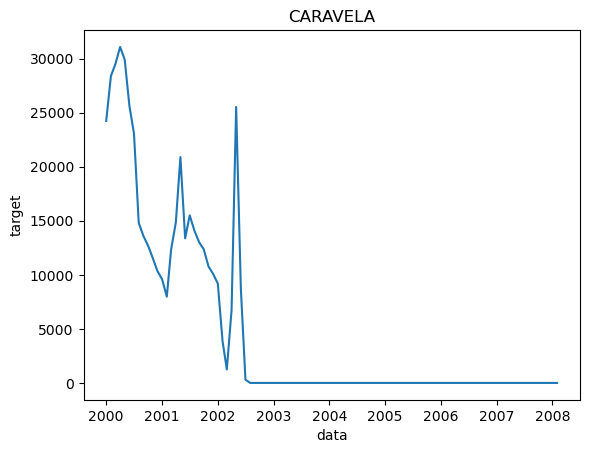

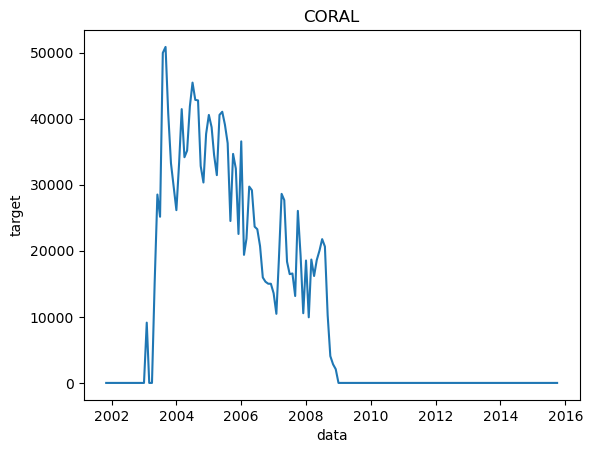

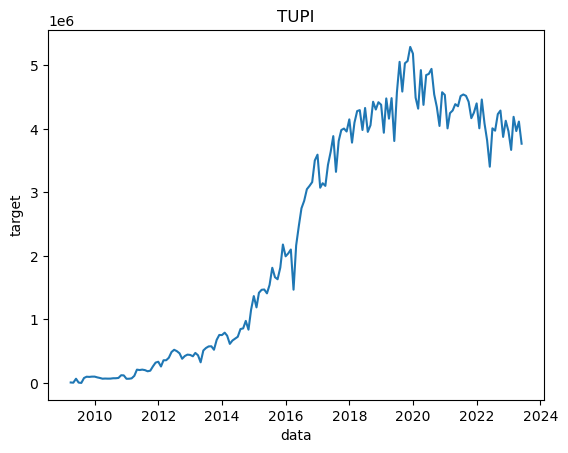

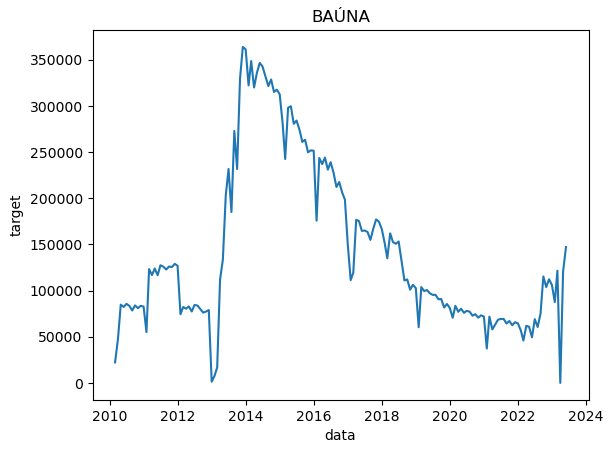

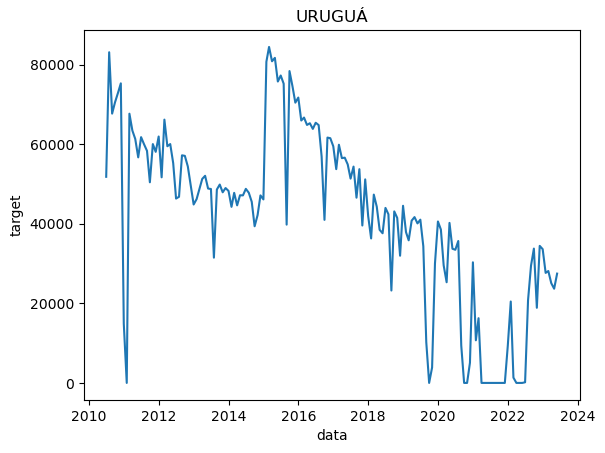

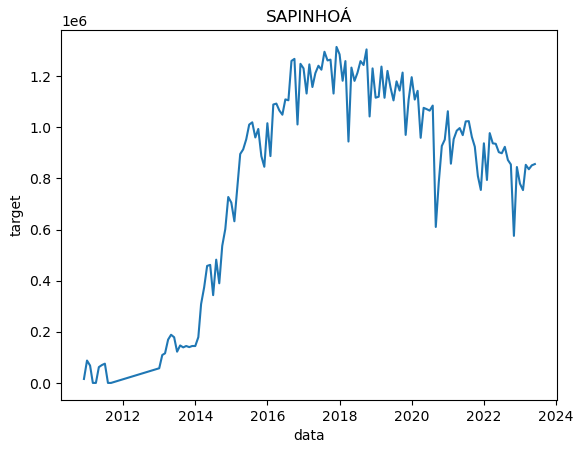

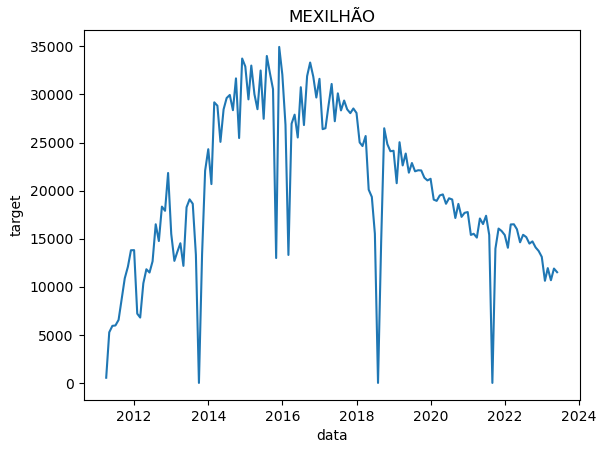

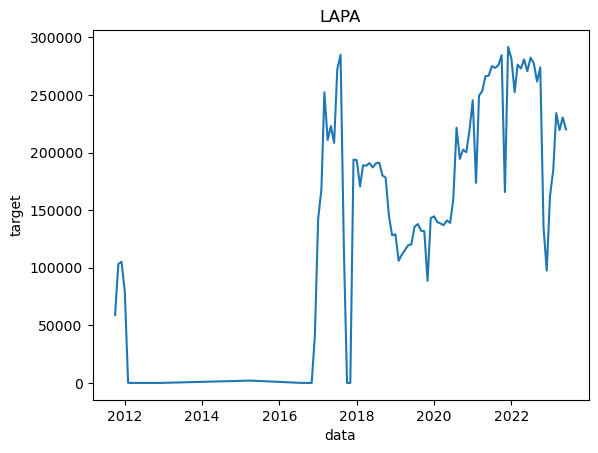

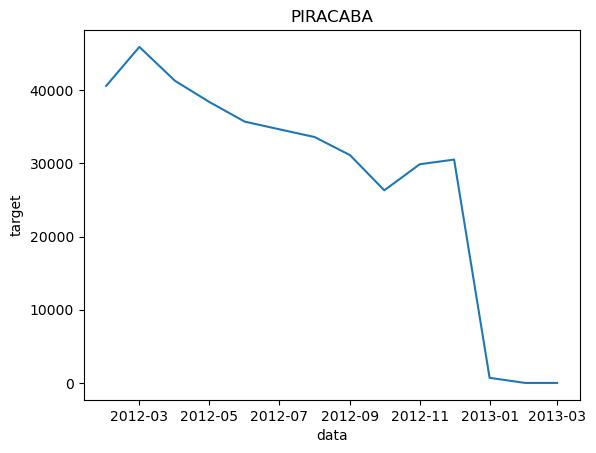

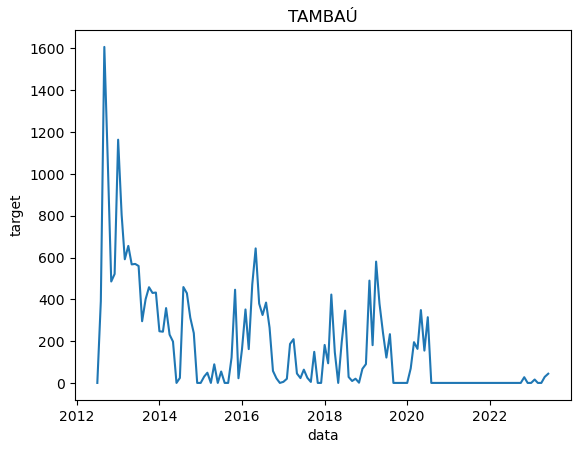

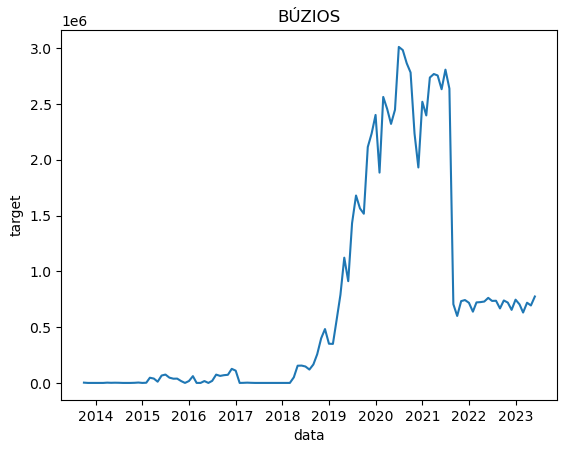

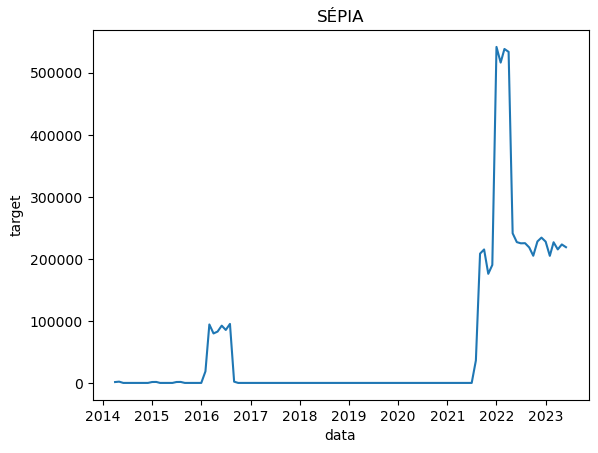

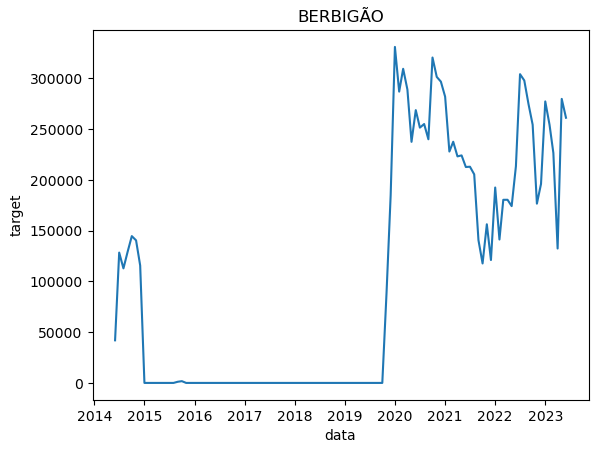

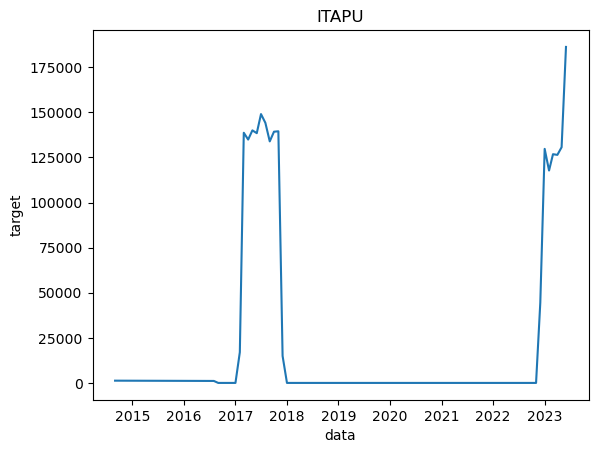

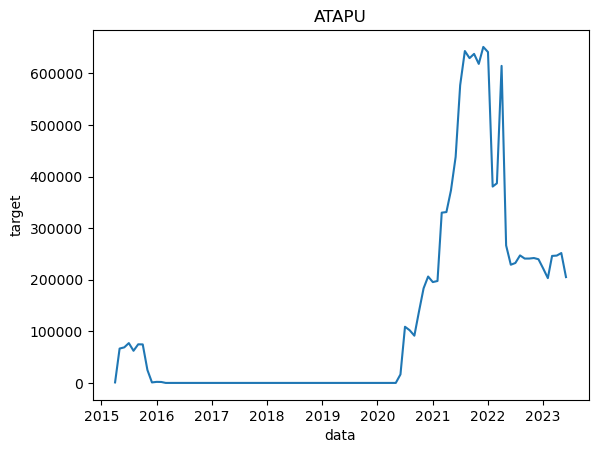

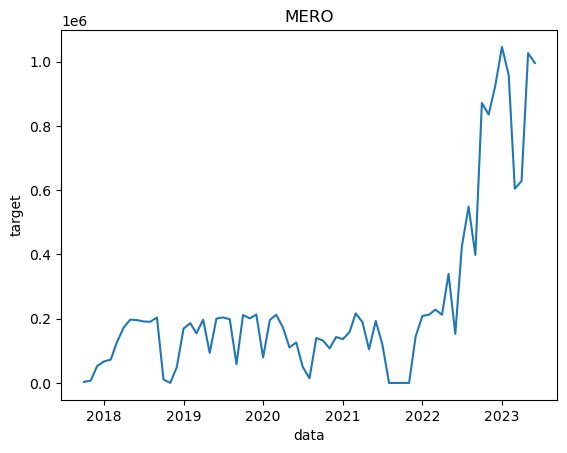

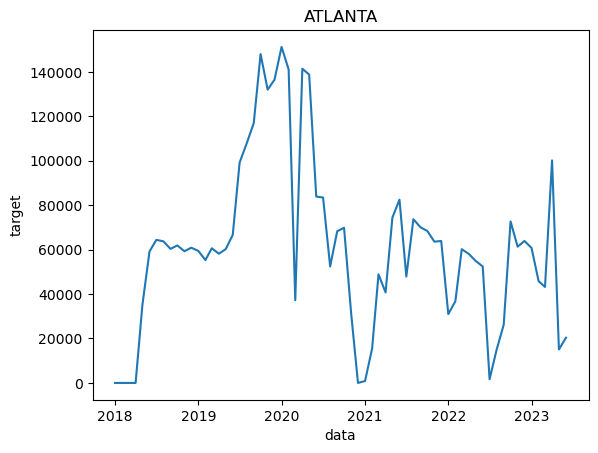

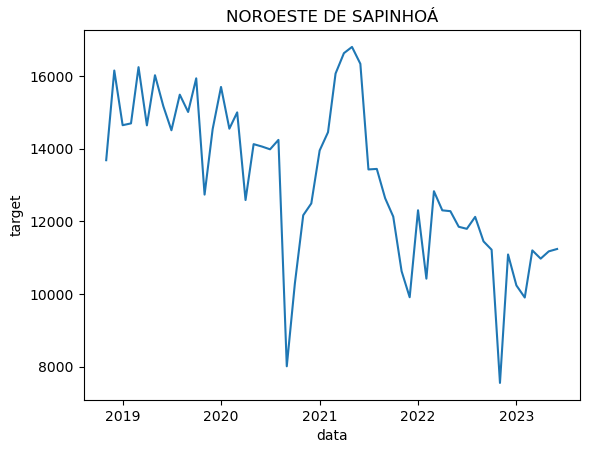

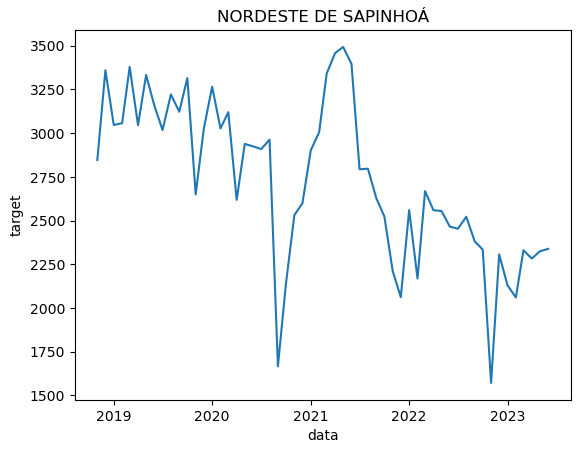

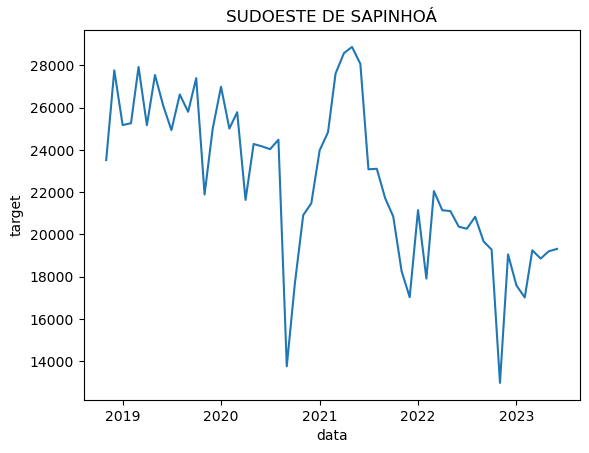

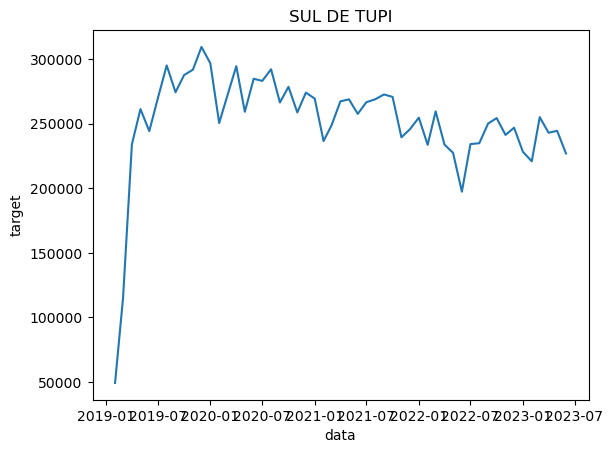

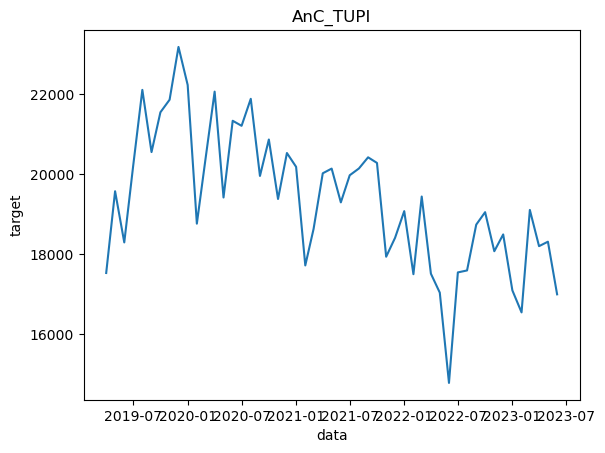

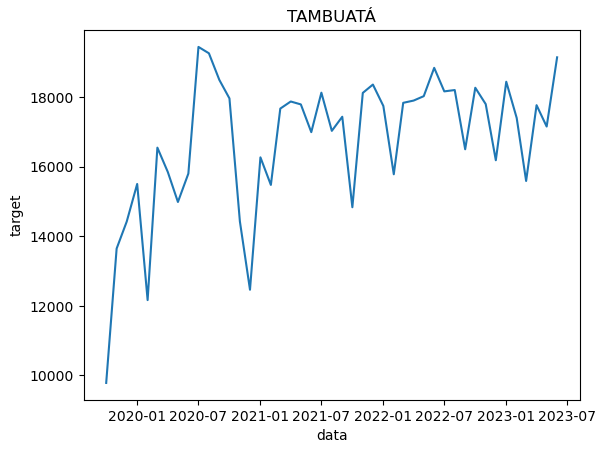

In [166]:
for i in df['campo'].unique():
    sns.lineplot(data = df[df['campo'] == i ] , y='target' , x ='data')
    plt.title(i)
    plt.show()

Notamos pelos gráficos que os filtros que foram feitos não contemplam os campos CARAVELA, CORAL e PIRACABA, que tiveram sua produção interrompida há muito tempo. Assim, faz sentido tirá-los dos estudo.

In [175]:
df = df[ ~ df['campo'].isin( ['CARAVELA','CORAL','PIRACABA'] ) ]

Portanto, sobram as seguintes bacias para realizar a previsão univariada da produção de petróleo de cada:

In [179]:
list( df['campo'].unique() )

['TUPI',
 'BAÚNA',
 'URUGUÁ',
 'SAPINHOÁ',
 'MEXILHÃO',
 'LAPA',
 'TAMBAÚ',
 'BÚZIOS',
 'SÉPIA',
 'BERBIGÃO',
 'ITAPU',
 'ATAPU',
 'MERO',
 'ATLANTA',
 'NOROESTE DE SAPINHOÁ',
 'NORDESTE DE SAPINHOÁ',
 'SUDOESTE DE SAPINHOÁ',
 'SUL DE TUPI',
 'AnC_TUPI',
 'TAMBUATÁ']

In [180]:
len(list( df['campo'].unique() ))

20

Analysing the length of each time series

In [181]:
df.groupby('campo').count()

,data_ini_prod,bacia,estados,localizacao,profundidade,target,data
campo,,,,,,,
ATAPU,99,99,99,99,99,99,99
ATLANTA,66,66,66,66,66,66,66
AnC_TUPI,51,51,51,51,51,51,51
BAÚNA,160,160,160,160,160,160,160
BERBIGÃO,109,109,109,109,109,109,109
BÚZIOS,116,116,116,116,116,116,116
ITAPU,84,84,84,84,84,84,84
LAPA,99,99,99,99,99,99,99
MERO,69,69,69,69,69,69,69


In [201]:
df = df.reset_index(drop=True)

# Preprocessing

Normalizing each time series with min-max in [0,1] range. Also, creating features with lagged values of the time series .

In [283]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit

In [331]:
import pickle

In [207]:
lag = 10

for i in range(1 , lag+1 ):
    df['x'+str(i)] = df.groupby('campo')['target'].shift(i)

In [231]:
df.columns

Index(['data_ini_prod', 'bacia', 'campo', 'estados', 'localizacao',
       'profundidade', 'target', 'data', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6',
       'x7', 'x8', 'x9', 'x10'],
      dtype='object')

In [248]:
pipe = {}

for j in df['campo'].unique():
    df_temp = df[ df['campo'] == j ][ [ 'x'+str(i) for i in range(1 , lag+1) ] + ['target'] ]
    scaler = MinMaxScaler()
    df_trans = scaler.fit_transform(df_temp)
    pipe[ j ] = []
    pipe[j].append( df_trans)
    pipe[j].append( scaler )

In [377]:
file_to_store = open("preprocessed_data.pickle", "wb")

pickle.dump(pipe , file_to_store)

file_to_store.close()